In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Face_recognition/images.jfif")

In [ ]:
img.shape


(183, 275, 3)

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img_gray.shape

(183, 275)

In [ ]:
#load the classifier

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [ ]:
#Perform the Face Detection

face = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [ ]:
#now we will draw a rectangular bounding box around the face

for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 1)     #4 is the thickness of the boundary of the bounding box

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 274.5, 182.5, -0.5)

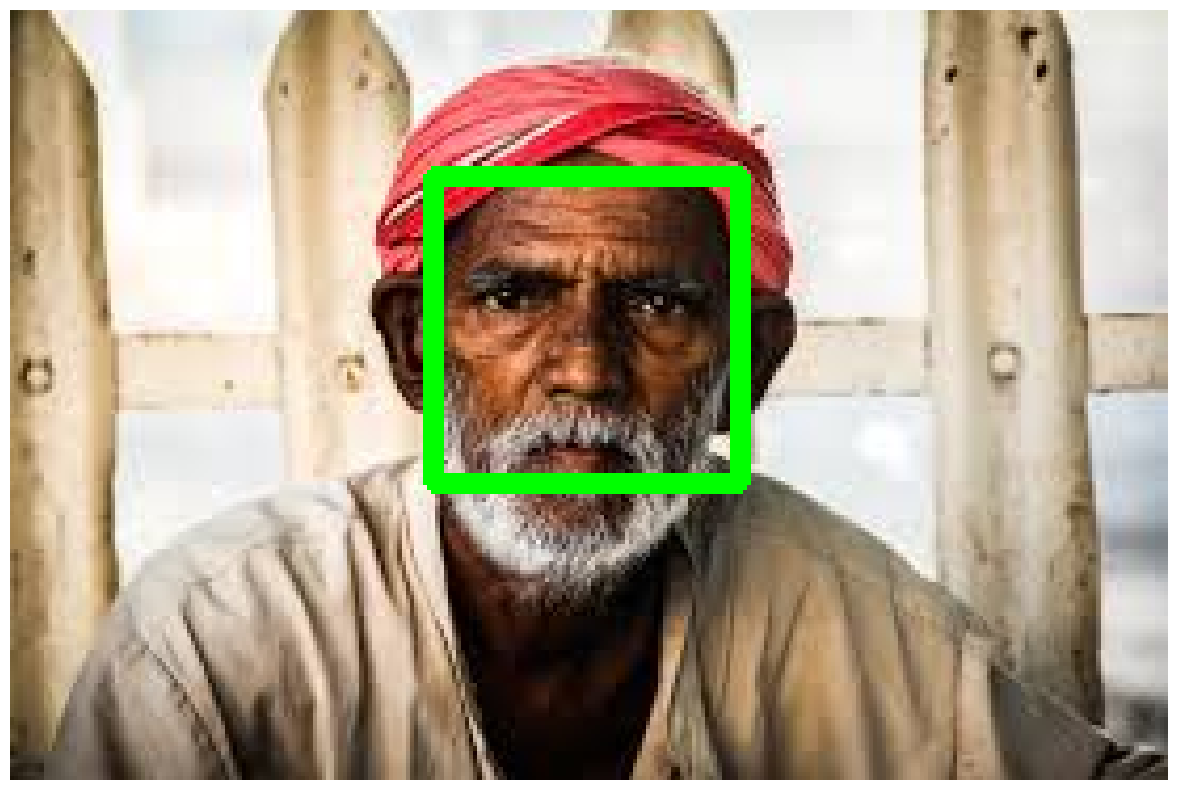

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

#**Face** Recognition

In [ ]:
trainingImagePath = '/content/drive/MyDrive/Face_recognition/Final Training Images'
testImagePath = '/content/drive/MyDrive/Face_recognition/Final Testing Images'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [ ]:
#we wont apply any pre processimg on the raw images of the test dataset

test_datagen = ImageDataGenerator()

In [ ]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 257 images belonging to 17 classes.


In [ ]:

# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 66 images belonging to 17 classes.


In [ ]:
# Printing class labels for each face
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [ ]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'Face17', 1: 'face1', 2: 'face10', 3: 'face11', 4: 'face12', 5: 'face13', 6: 'face14', 7: 'face15', 8: 'face16', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}

 The Number of output neurons:  17


In [ ]:
# so in our CNN model we would have:
#2 hideen convolutional layers
#2 hidden pooling layers
#16 neurons in the output layer since we have 17 classes
# and 1 flattening layer

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

''' ADDITIONAL LAYER of CONVOLUTION for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

''' STEP--3 FLattening'''
classifier.add(Flatten())

'''STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



# Starting the model training
classifier.fit(
    training_set,
    steps_per_epoch=8,         #number of steps per epoch = (Total number of training samples / Batch size), here i have 244 training images and the batch size is 32, therefore the steps_per_epochs comes out to be 7.6 = 8
    epochs=15,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 57.3803 - accuracy: 0.0844

8/8 [==============================] - 9s 1s/step - loss: 57.3803 - accuracy: 0.0844 - val_loss: 7.9075 - val_accuracy: 0.0606
Epoch 2/15
8/8 [==============================] - 3s 396ms/step - loss: 3.5717 - accuracy: 0.1022
Epoch 3/15
8/8 [==============================] - 3s 392ms/step - loss: 2.5844 - accuracy: 0.2267
Epoch 4/15
8/8 [==============================] - 4s 478ms/step - loss: 2.1297 - accuracy: 0.4044
Epoch 5/15
8/8 [==============================] - 3s 397ms/step - loss: 1.5766 - accuracy: 0.5200
Epoch 6/15
8/8 [==============================] - 3s 390ms/step - loss: 1.1549 - accuracy: 0.6533
Epoch 7/15
8/8 [==============================] - 5s 571ms/step - loss: 0.7554 - accuracy: 0.7644
Epoch 8/15
8/8 [==============================] - 4s 447ms/step - loss: 0.4333 - accuracy: 0.8555
Epoch 9/15
8/8 [==============================] - 3s 383ms/step - loss: 0.3110 - accuracy: 0.8978
Epoch 10/15
8/8 [==============================] - 4s 521ms/step - loss: 0.1313 - accurac

In [ ]:
'''Making single predictions'''
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/Face_recognition/Final Testing Images/face12/3face12.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face12
